# Question 1: Integration

In [184]:
#Imports
%matplotlib inline
import math
import matplotlib.pyplot as plt
import numpy as np

First, I will define the function to be integrated, and its analytical answer:

In [185]:
#function to be integrated
def f(x):
    return 1/(x**(3/2))

#range
a = 1
b = 5

#exact result
ans = 2-2/(math.sqrt(5))

## Rectangle Rule

In [186]:
#Rectangle function
def rect(f,a,b,N):

    #imports
    import numpy as np

    #compute delta x
    dx = (b-a)/N
    
    #generate x values
    xvals = np.linspace(a,b,N, endpoint = False)

    #multiply and sum to compute integral    
    return np.sum(f(xvals),dtype = 'float64')*dx

## Trapezoid Rule

In [187]:
#Trapezoid function
def trap(f,a,b,N):
     
    #imports
    import numpy as np

    #compute delta x
    dx = (b-a)/N
    
    #generate x values
    xvals = np.linspace(a,b,N)

    #evaluate function at x values
    yvals = f(xvals)

    #Take the averages between each pair of y values and sum to compute the integral
    return (dx/2) * np.sum( yvals[:N-1] + yvals[1:],dtype = 'float64' )

## Simpson's Rule

In [188]:
#Simpson's function
def simp(f,a,b,N):
    
    #imports
    import numpy as np

    #compute delta x
    dx = (b-a)/N
    
    #generate x values
    xvals = np.linspace(a,b,N)

    #evaluate function at x values
    yvals = f(xvals)

    #Simpson's Rule is simply 4*(every odd y value) and 2*(every even y value) in the sums
    return (dx/3) * ( 4*np.sum(yvals[1::2],dtype = 'float64') + 2*np.sum(yvals[2::2],dtype = 'float64' )  + yvals[0] + yvals[-1])

## Performance Comparison Function

In [189]:
#Error and performance function
def testInt(intFunc,f,a,b,Nrange,NstepSize,ans,tolerance):
    #imports
    import time

    #initialize arrays
    Nbins = np.arange(Nrange[0],Nrange[1],NstepSize)
    results = []
    times = []
    Ntolerance = 0

    #repeatedly integrate for each N value, and time each step:
    for i in Nbins.astype("int"):
        
        #start clock 
        start = time.time()
        
        #relative error
        result = abs(intFunc(f,a,b,i)-ans)/ans
        
        #stop clock
        stop = time.time()-start

        #update times array
        times.append(stop)

        #update results array
        results.append(result)

        # check tolerance
        if Ntolerance == 0 and result < tolerance:
            Ntolerance = i

    return results, times, Nbins, Ntolerance

## Results

In [190]:
#Choose test parameters
Nrange = [100,1000000]
NstepSize = 1000
tolerance1 = 10**(-3)
tolerance2 = 10**(-5)

Rectangle Rule Plotting

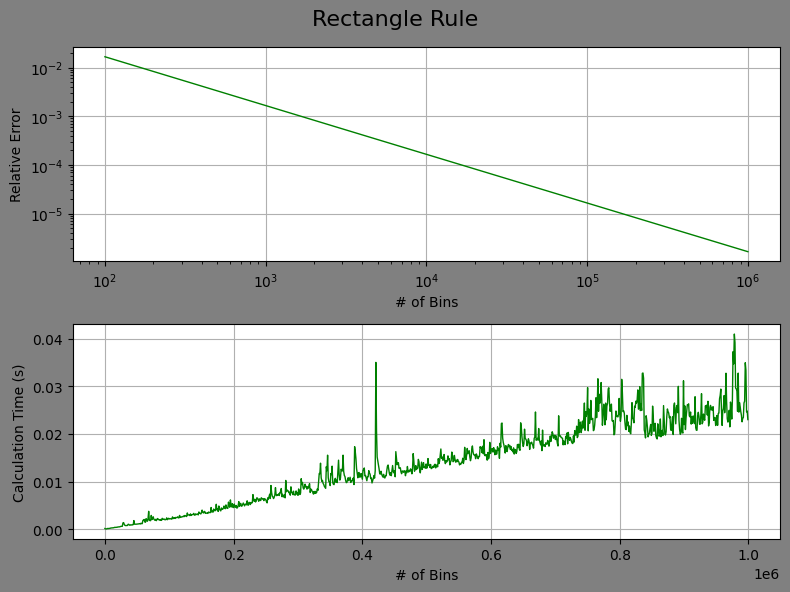

In [191]:
#make figure
fig, axs = plt.subplots(2, figsize = (8,6), facecolor = "gray")
fig.suptitle('Rectangle Rule', fontsize = 16)

#call test function
RectErrors, RectTimes, RectBins, rectTolerance1 = testInt(rect,f,a,b,Nrange,NstepSize,ans,tolerance1)
RectErrors, RectTimes, RectBins, rectTolerance2 = testInt(rect,f,a,b,Nrange,NstepSize,ans,tolerance2)

#plot
axs[0].loglog(RectBins, RectErrors, linewidth = 1, color = "green")
axs[0].set_xlabel("# of Bins")
axs[0].set_ylabel("Relative Error")

axs[0].grid(True)

axs[1].plot(RectBins, RectTimes, linewidth = 1, color = "green")
axs[1].set_xlabel("# of Bins")
axs[1].set_ylabel("Calculation Time (s)")
axs[1].grid(True)

fig.tight_layout()


Trapezoid Rule Plotting

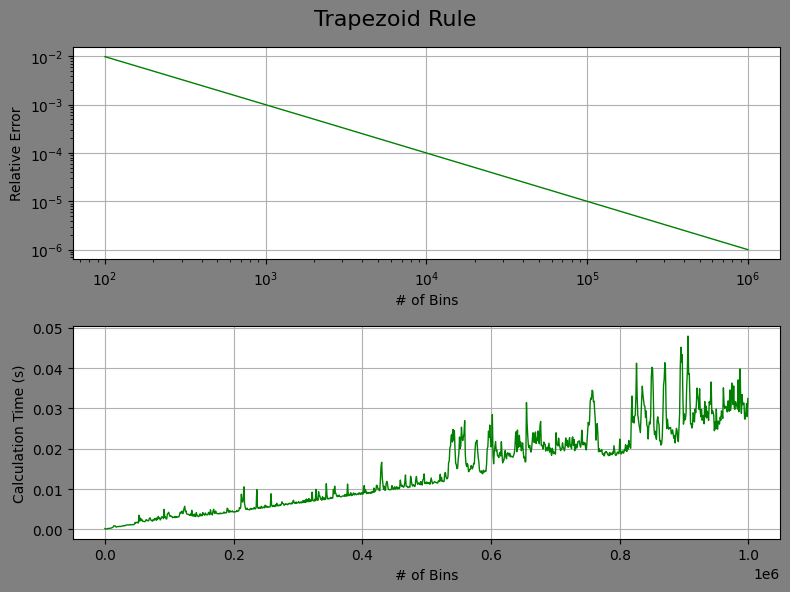

In [192]:
#make figure
fig, axs = plt.subplots(2, figsize = (8,6), facecolor = "gray")
fig.suptitle('Trapezoid Rule', fontsize = 16)


#call test function
TrapErrors, TrapTimes, TrapBins, trapTolerance1 = testInt(trap,f,a,b,Nrange,NstepSize,ans,tolerance1)
TrapErrors, TrapTimes, TrapBins, trapTolerance2 = testInt(trap,f,a,b,Nrange,NstepSize,ans,tolerance2)

#plot
axs[0].loglog(TrapBins, TrapErrors, linewidth = 1, color = "green")
axs[0].set_xlabel("# of Bins")
axs[0].set_ylabel("Relative Error")
axs[0].grid(True)

axs[1].plot(TrapBins, TrapTimes, linewidth = 1, color = "green")
axs[1].set_xlabel("# of Bins")
axs[1].set_ylabel("Calculation Time (s)")
axs[1].grid(True)

fig.tight_layout()

Simpson's Rule Plotting

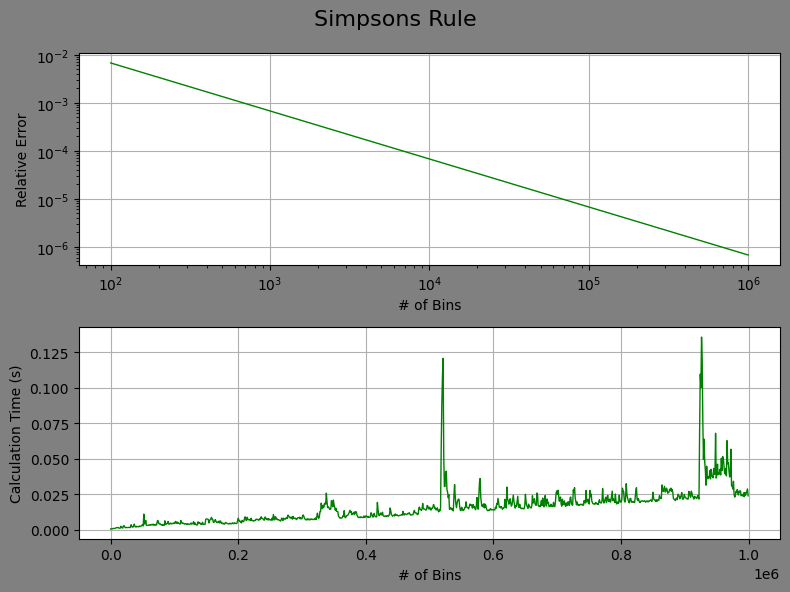

In [193]:
#make figure
fig, axs = plt.subplots(2, figsize = (8,6), facecolor = "gray")

fig.suptitle('Simpsons Rule', fontsize = 16)

#call test function
SimpErrors, SimpTimes, SimpBins, simpTolerance1 = testInt(simp,f,a,b,Nrange,NstepSize,ans,tolerance1)
SimpErrors, SimpTimes, SimpBins, simpTolerance2 = testInt(simp,f,a,b,Nrange,NstepSize,ans,tolerance2)

#plot
axs[0].loglog(SimpBins, SimpErrors, linewidth = 1, color = "green")
axs[0].set_xlabel("# of Bins")
axs[0].set_ylabel("Relative Error")
axs[0].grid(True)

axs[1].plot(SimpBins, SimpTimes, linewidth = 1, color = "green")
axs[1].set_xlabel("# of Bins")
axs[1].set_ylabel("Calculation Time (s)")
axs[1].grid(True)

fig.tight_layout()

In [194]:
print(f"The rectangle rule takes about {rectTolerance1} bins for relative error below {tolerance1}, and {rectTolerance2} bins for relative error below {tolerance2}.")
print(f"The trapezoid rule takes about {trapTolerance1} bins for relative error below {tolerance1}, and {trapTolerance2} bins for relative error below {tolerance2}.")
print(f"Simpson's rule takes about {simpTolerance1} bins for relative error below {tolerance1}, and {simpTolerance2} bins for relative error below {tolerance2}.")

The rectangle rule takes about 2100 bins for relative error below 0.001, and 165100 bins for relative error below 1e-05.
The trapezoid rule takes about 1100 bins for relative error below 0.001, and 100100 bins for relative error below 1e-05.
Simpson's rule takes about 1100 bins for relative error below 0.001, and 68100 bins for relative error below 1e-05.


Clearly Simpson's rule is the most accurate, and the slowest. The opposite is true for Rectangle rule, and Trapezoid is middling in both metrics. There are inefficiencies in my implementation of the performance testing, where I call the testing function twice: once for each tolerance. But the result still stands, that each rule is successively more accurate and more expensive going from Rectangle to Trapezoid to Simpson's.

# Question 2

Stealing the given code for finding radii:

In [196]:
#imports
%matplotlib inline
import numpy
import matplotlib 
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline as US
import scipy.integrate as s_int
import time
import math

In [197]:
# total number of particles
nptot=10**6
# total mass of halo (in M_sun)
mtot=1e12
# Hernquist scale radius (in kpc)
aa=35.0
# Newton's constant, where M is in M_sun, v is in km/s, and r is in kpc:
gn=4.30071e-6

In [198]:
# set random state 
my_randState=numpy.random.RandomState(seed=1010)

# random radii
randvs_r=my_randState.rand(nptot)
rvals=numpy.sort(1/(randvs_r**(-0.5)-1.))
rvals *= aa

# random numbers for phi, theta, v_phi, v_theta:
new_randvec=my_randState.rand(2, nptot)

#initialize 3d positions array
pos=numpy.zeros((nptot, 3), dtype='float32')

#coordinate transformation
phir=2e0*math.pi*new_randvec[0]
thetar=numpy.arccos(1e0-2e0*new_randvec[1])

#positions
pos[:,0]=rvals*numpy.sin(thetar)*numpy.cos(phir)
pos[:,1]=rvals*numpy.sin(thetar)*numpy.sin(phir)
pos[:,2]=rvals*numpy.cos(thetar)

Now I will define the distribution function as given in Hernquist's paper:

In [199]:
#Distribution Function (without phi)
def f_hern(E,a,G,M):

    #imports
    import math
    import numpy as np

    #define intermediate variables
    q = np.sqrt(a*E/(G*M))
    v = np.sqrt((G*M)/a)

    #return function
    return M/(8*math.sqrt(2)*(math.pi*a*v)**3) * 1/((1-q**2)**(5/2)) *\
    (3*np.arcsin(q) + q*(1-q**2)**(1/2) * (1-2*q**2) * (8*q**4-8*q**2-3))

I can now define the various other needed functions, including a 1-variable distribution function for our specific halo, its integral, this halos total distribution function including the density of states, and my bounding function.

In [ ]:
#import random
import random

#potential 
def phi(r):
    return gn*mtot/(r+aa)
    
#f(E) for our specific halo
def f_halo(E):
    return f_hern(E,aa,gn,mtot)

#F(E) for the halo
def F_halo(E):
    return s_int.quad(f_halo,0,E)[0]

#Distribution function for our specific halo
def dist(E,r):
    return np.sqrt(phi(r)-E)*f_halo(E)

#Bounding PDF
def bound(E,r):
    return np.sqrt(phi(r))*f_halo(E)

Now I define a table of energies across the spectrum we will need, and I calculate a tabulated CDF of the distribution function to be used for inversion later.

In [ ]:
#max energy
E_max = phi(0)-0.00000000001

#Array of energies
E_table = np.linspace(0,E_max,1000)

#corresponding CDF values
CDF_vals = np.cumsum(f_halo(E_table))
CDF_vals /= CDF_vals[-1]

Now I can check the bounding function's validity, choosing a random middling radius (r_test) to plot the Hernquist distribution and the bounding function I chose, in order to check that it truly envelopes the distribution, as expected.

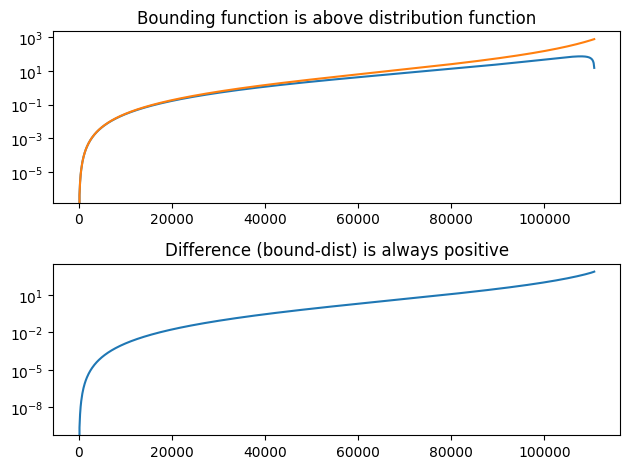

In [ ]:
#check Bounding function validity
r_test = rvals[10000]
index_cut = np.searchsorted(E_table,phi(r_test))
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(E_table[:index_cut],dist(E_table[:index_cut],r_test))
ax1.plot(E_table[:index_cut],bound(E_table[:index_cut],r_test))
ax1.set_yscale('log')
ax1.set_title("Bounding function is above distribution function")
ax2.plot(E_table[:index_cut],bound(E_table[:index_cut],r_test)-dist(E_table[:index_cut],r_test))
ax2.set_yscale('log')
ax2.set_title("Difference (bound-dist) is always positive")

fig.tight_layout()

Here is the script for sampling the energies by looping through the radii. I essentially invert the CDF by using the lookup table I created before. Then I cut things off at the max energy for that radius and select a random CDF value and find the corresponding energy. Then I choose a random value under the curve of the bounding function at that energy, reject it if it is over the Hernquist PDF and accept it if it is under.

In [141]:
#Find energies
energies = []

t = time.time()
for r in rvals:
    
    #Rescale the F(E) to be the bounding function for this radius (sqrt(phi)*F(E))
    scaled_CDF = math.sqrt(phi(r))*CDF_vals
    
    #Create tabulated bounding CDF for this radius (ordered pairs of sqrt(phi)*F(E),E)
    CDF_table = np.stack((scaled_CDF,E_table),-1)

    #find the index of the max E for this r
    index_cut = np.searchsorted(E_table,phi(r))

    #cut the CDF and E arrays
    E_cut, scaled_CDF = E_table[:index_cut], scaled_CDF[:index_cut]
    
    #Choose a random number from 0 to the maximum F(E) stored in CDF_table
    randF = random.random()*max(scaled_CDF)
    
    #Find the index of the nearest value in the CDF_vals
    nearest_index = np.searchsorted(scaled_CDF,randF)
    nearest_index = min(nearest_index, len(E_cut) - 1)

    #choose the corresponding E
    E_value = CDF_table[nearest_index][1]

    #choose a random number between 0 and the value of the bounding function at this energy
    randf = random.random()*bound(E_value,r)

    #check if it is below the distribution function
    while randf > math.sqrt(phi(r)-E_value)*f_halo(E_value):
        
        #if it fails, generate a new energy E
        randF = random.random()*max(scaled_CDF)
        nearest_index = np.searchsorted(scaled_CDF,randF)
        E_value = CDF_table[nearest_index][1]

        #generate new number to be checked
        randf = random.random()*bound(E_value,r)
        
    #if success, add to the array
    energies += [E_value]

print(f"The entire computation took {time.time()-t} seconds")

142.5582356452942


Now I can make my velocities into 3-vectors. I do this the exact same way as was done with the positions.

In [142]:
#make velocity 3-vectors in the same way as positions were done

#velocity vector lengths
v_lengths = np.sqrt(2*(phi(rvals)-energies))

#initialize 3d velocities array
vels=numpy.zeros((nptot, 3), dtype='float32')

#random vector
new_randvec = my_randState.rand(2, nptot)

#coordinate transformation
phir=2e0*math.pi*new_randvec[0]
thetar=numpy.arccos(1e0-2e0*new_randvec[1])

#positions
vels[:,0]=v_lengths*numpy.sin(thetar)*numpy.cos(phir)
vels[:,1]=v_lengths*numpy.sin(thetar)*numpy.sin(phir)
vels[:,2]=v_lengths*numpy.cos(thetar)

Lastly I will check against the velocity dispersion given in Hernquist's paper. I define the theory function and create plottable arrays from it. 
Then I do a dot product to find the v_r components of each velocity, and bin them. 
I use binned_statistics from scipy.stats to compute the sdev of each bin, and then use the bin centers for plotting purposes.

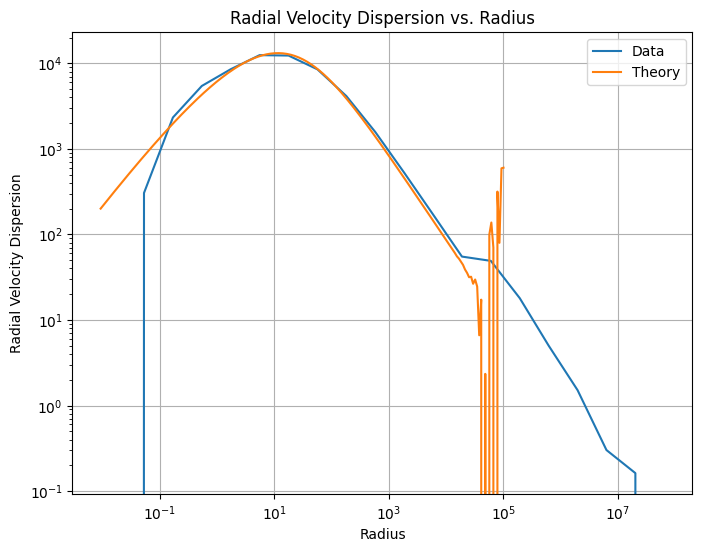

In [159]:
from scipy.stats import binned_statistic

#the theory
def vdisp(r,G,M,a):
    return G*M/(12*a) * (12*r*((r+a)**3)/(a**4)*np.log((r+a)/r) - r/(r+a) * \
    (25 + 52*r/a + 42*(r/a)**2 + 12*(r/a)**3))

#theory arrays
r_theory = np.logspace(np.log10(rvals.min()), 5, 200)
vdisp_theory = vdisp(r_theory, gn, mtot, aa)

#radial velocity components from dot product v*r
v_rads = (vels[:,0] * pos[:,0] + vels[:,1] * pos[:,1] + vels[:,2] * pos[:,2]) / rvals

#logarithmic bins
num_bins = 20  
bins = np.logspace(np.log10(rvals.min()), np.log10(rvals.max()), num_bins + 1)

#binned_statistic to calculate the stdev of each bin
sigma_rad, bin_edges, binnumber = binned_statistic(rvals, v_rads, statistic=np.std, bins=bins)

#bin centers for plotting
bin_centers = np.sqrt(bin_edges[:-1] * bin_edges[1:])

#plot
plt.figure(figsize=(8,6))
plt.loglog(bin_centers, (sigma_rad)**2, label = "Data")
plt.loglog(r_theory, vdisp_theory, label = "Theory")
plt.xlabel("Radius")
plt.ylabel("Radial Velocity Dispersion")
plt.title("Radial Velocity Dispersion vs. Radius")
plt.legend()
plt.grid(True)
plt.show()

As can be seen from the plot, agreement is good. I did not bother to sample enough to cover the entire tail with the theory curve, and the innermost radii do not extend as far for the data. Overall, the match is good for the peak, meaning my velocities were sampled correctly.

# Reflection

My code is somewhat efficient, I have heard others have slower, but also some have faster. Overall the slowest part is the velocity sampling, as can be expected for a nested loop over such a large array. It is unclear whether creating the tabulated CDF ahead of time was actually a time save. 

I think the numpy.searchsorted() method is quite slow, so if there is a better way to actually use the lookup table, it might shine more. 

Selecting velocities near the maximum energy is the least efficient, as can be seen by the plot showing the bounding function against the theory distribution. The largest dissagreement is clearly at large energies, which creates a possibility for a larger rejection ratio in that region. If I had more time, I would build a better bounding function.